# STUDENT PERFORMANCE PREDICTION

# Dataset Description

#### This dataset contains information about student performance in Portugese in two different secondary schools. The dataset includes student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. The attribute information can be seen below:
* school: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex: student's sex (binary: 'F' - female or 'M' - male)
* age: student's age (numeric: from 15 to 22)
* address: student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade 3-secondary education or 4-higher education)
* Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2- 5th to 9th grade, 3 - secondary education or 4- higher education)
* Mjob: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian: student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures: number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup: extra educational support (binary: yes or no)
* famsup: family educational support (binary: yes or no)
* paid: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities: extra-curricular activities (binary: yes or no)
* nursery: attended nursery school (binary: yes or no)
* higher: wants to take higher education (binary: yes or no)
* internet: Internet access at home (binary: yes or no)
* romantic: with a romantic relationship (binary: yes or no)
* famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime: free time after school (numeric: from 1 - very low to 5 - very high)
* goout: going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health: current health status (numeric: from 1 - very bad to 5 - very good)
* absences: number of school absences (numeric: from 0 to 93)
* G1: first period grade (numeric: from 0 to 20)
* G2: second period grade (numeric: from 0 to 20)
* G3: final grade (numeric: from 0 to 20, output target)

# Load the data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load and preview the dataset
df = pd.read_csv('student-por.csv')
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## Data Cleaning

In [4]:
#check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No missing values in the dataset.

In [5]:
# check for duplicates
df.duplicated().value_counts()

False    649
dtype: int64

The dataset has no dupicates 

In [6]:
# renaming columns
new_names = {'famsize':'fam_size','Pstatus': 'p_status',
             'Medu':'m_edu','Fedu':'f_edu','Mjob':'m_job',
             'Fjob':'f_job','traveltime':'travel_time',
             'studytime':'study_time','schoolsup':'school_sup',
             'famrel':'fam_rel','famsup':'fam_sup','freetime':'free_time',
             'goout':'go_out','Dalc':'D_alc','Walc':'W_alc'}

df.rename(columns=new_names,inplace=True)
df.columns

Index(['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time',
       'study_time', 'failures', 'school_sup', 'fam_sup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time',
       'go_out', 'D_alc', 'W_alc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
# Calculating skewness for numeric features
'''
Skewness measures the asymmetry of a normal distribution away from the distribution’s mean. 
A skewness value can be either positive or negative, depending on the directionality of the skew.
'''

df.skew(numeric_only=True)

age            0.416795
m_edu         -0.029950
f_edu          0.215343
travel_time    1.247648
study_time     0.699619
failures       3.092699
fam_rel       -1.105934
free_time     -0.181277
go_out        -0.008580
D_alc          2.141913
W_alc          0.635904
health        -0.500656
absences       2.020694
G1            -0.002774
G2            -0.360283
G3            -0.912909
dtype: float64

1. G1 and G2 are both skewed to the left with an approximately symmetric degree of skewness
2. G3 is also skewed to the left with a moderate degree of skewness

## Exploratory data analysis

### Univariate analysis

G3 is the target variable in this dataset. We will start by analyzing the target variable.

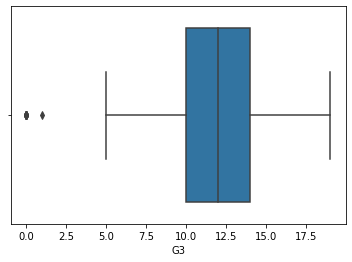

In [8]:
# boxplot of the target variable
sns.boxplot(x = df['G3']);

In [9]:
# Identify the outliers
Q1 = df['G3'].quantile(0.25)
Q3 = df['G3'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['G3'] < (Q1 - 1.5 * IQR)) | (df['G3'] > (Q3 + 1.5 * IQR))]
outliers['G3'].unique()

array([0, 1], dtype=int64)

The final grade(G3) has outliers. It consists of students with a grade of 0 and 1. <br>
These outliers won't be dropped since the students performed poorly.

In [10]:
# Creating Crosstab to butress outliers
outliers_spread = pd.crosstab(
    index=df['school'],
    columns=df['G3'],
)

outliers_spread

G3,0,1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
school,,,,,,,,,,,,,,,,,
GP,1,1,1,2,3,14,10,53,70,55,67,46,41,25,24,9,1
MS,14,0,0,1,7,21,25,44,34,17,15,17,8,11,5,6,1


we can see that students of 'MS' - Mousinho da Silveira contributed majorly to the outliers

In [11]:
#crosstabs to explore G3 mean performance of male and female in both schools

mean_G3_by_sex_school = pd.crosstab(
    index=df['sex'],
    columns=df['school'],
    values=df['G3'],
    aggfunc='mean'
)

mean_G3_by_sex_school

school,GP,MS
sex,,
F,13.004219,11.034247
M,12.032258,9.950000


we can also see that females are marginally performing better than males in both schools.

#Histplot and Boxplot for sex and school features as related to student's grade

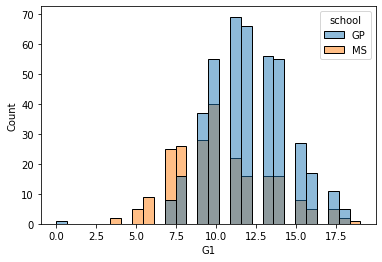

In [12]:
sns.histplot(data=df, x="G1", hue="school");

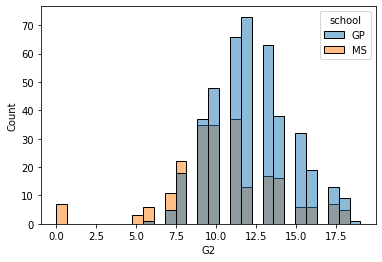

In [13]:
sns.histplot(data=df, x="G2", hue="school");

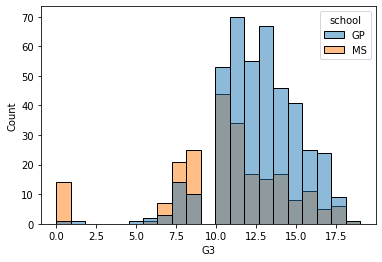

In [14]:
sns.histplot(data=df, x="G3", hue="school");

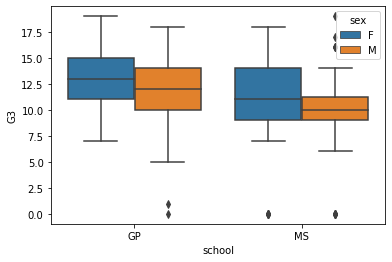

In [16]:
sns.boxplot(x="school", y="G3", data = df, hue = "sex");

#Visualizing the numerical features multidimensional relationship

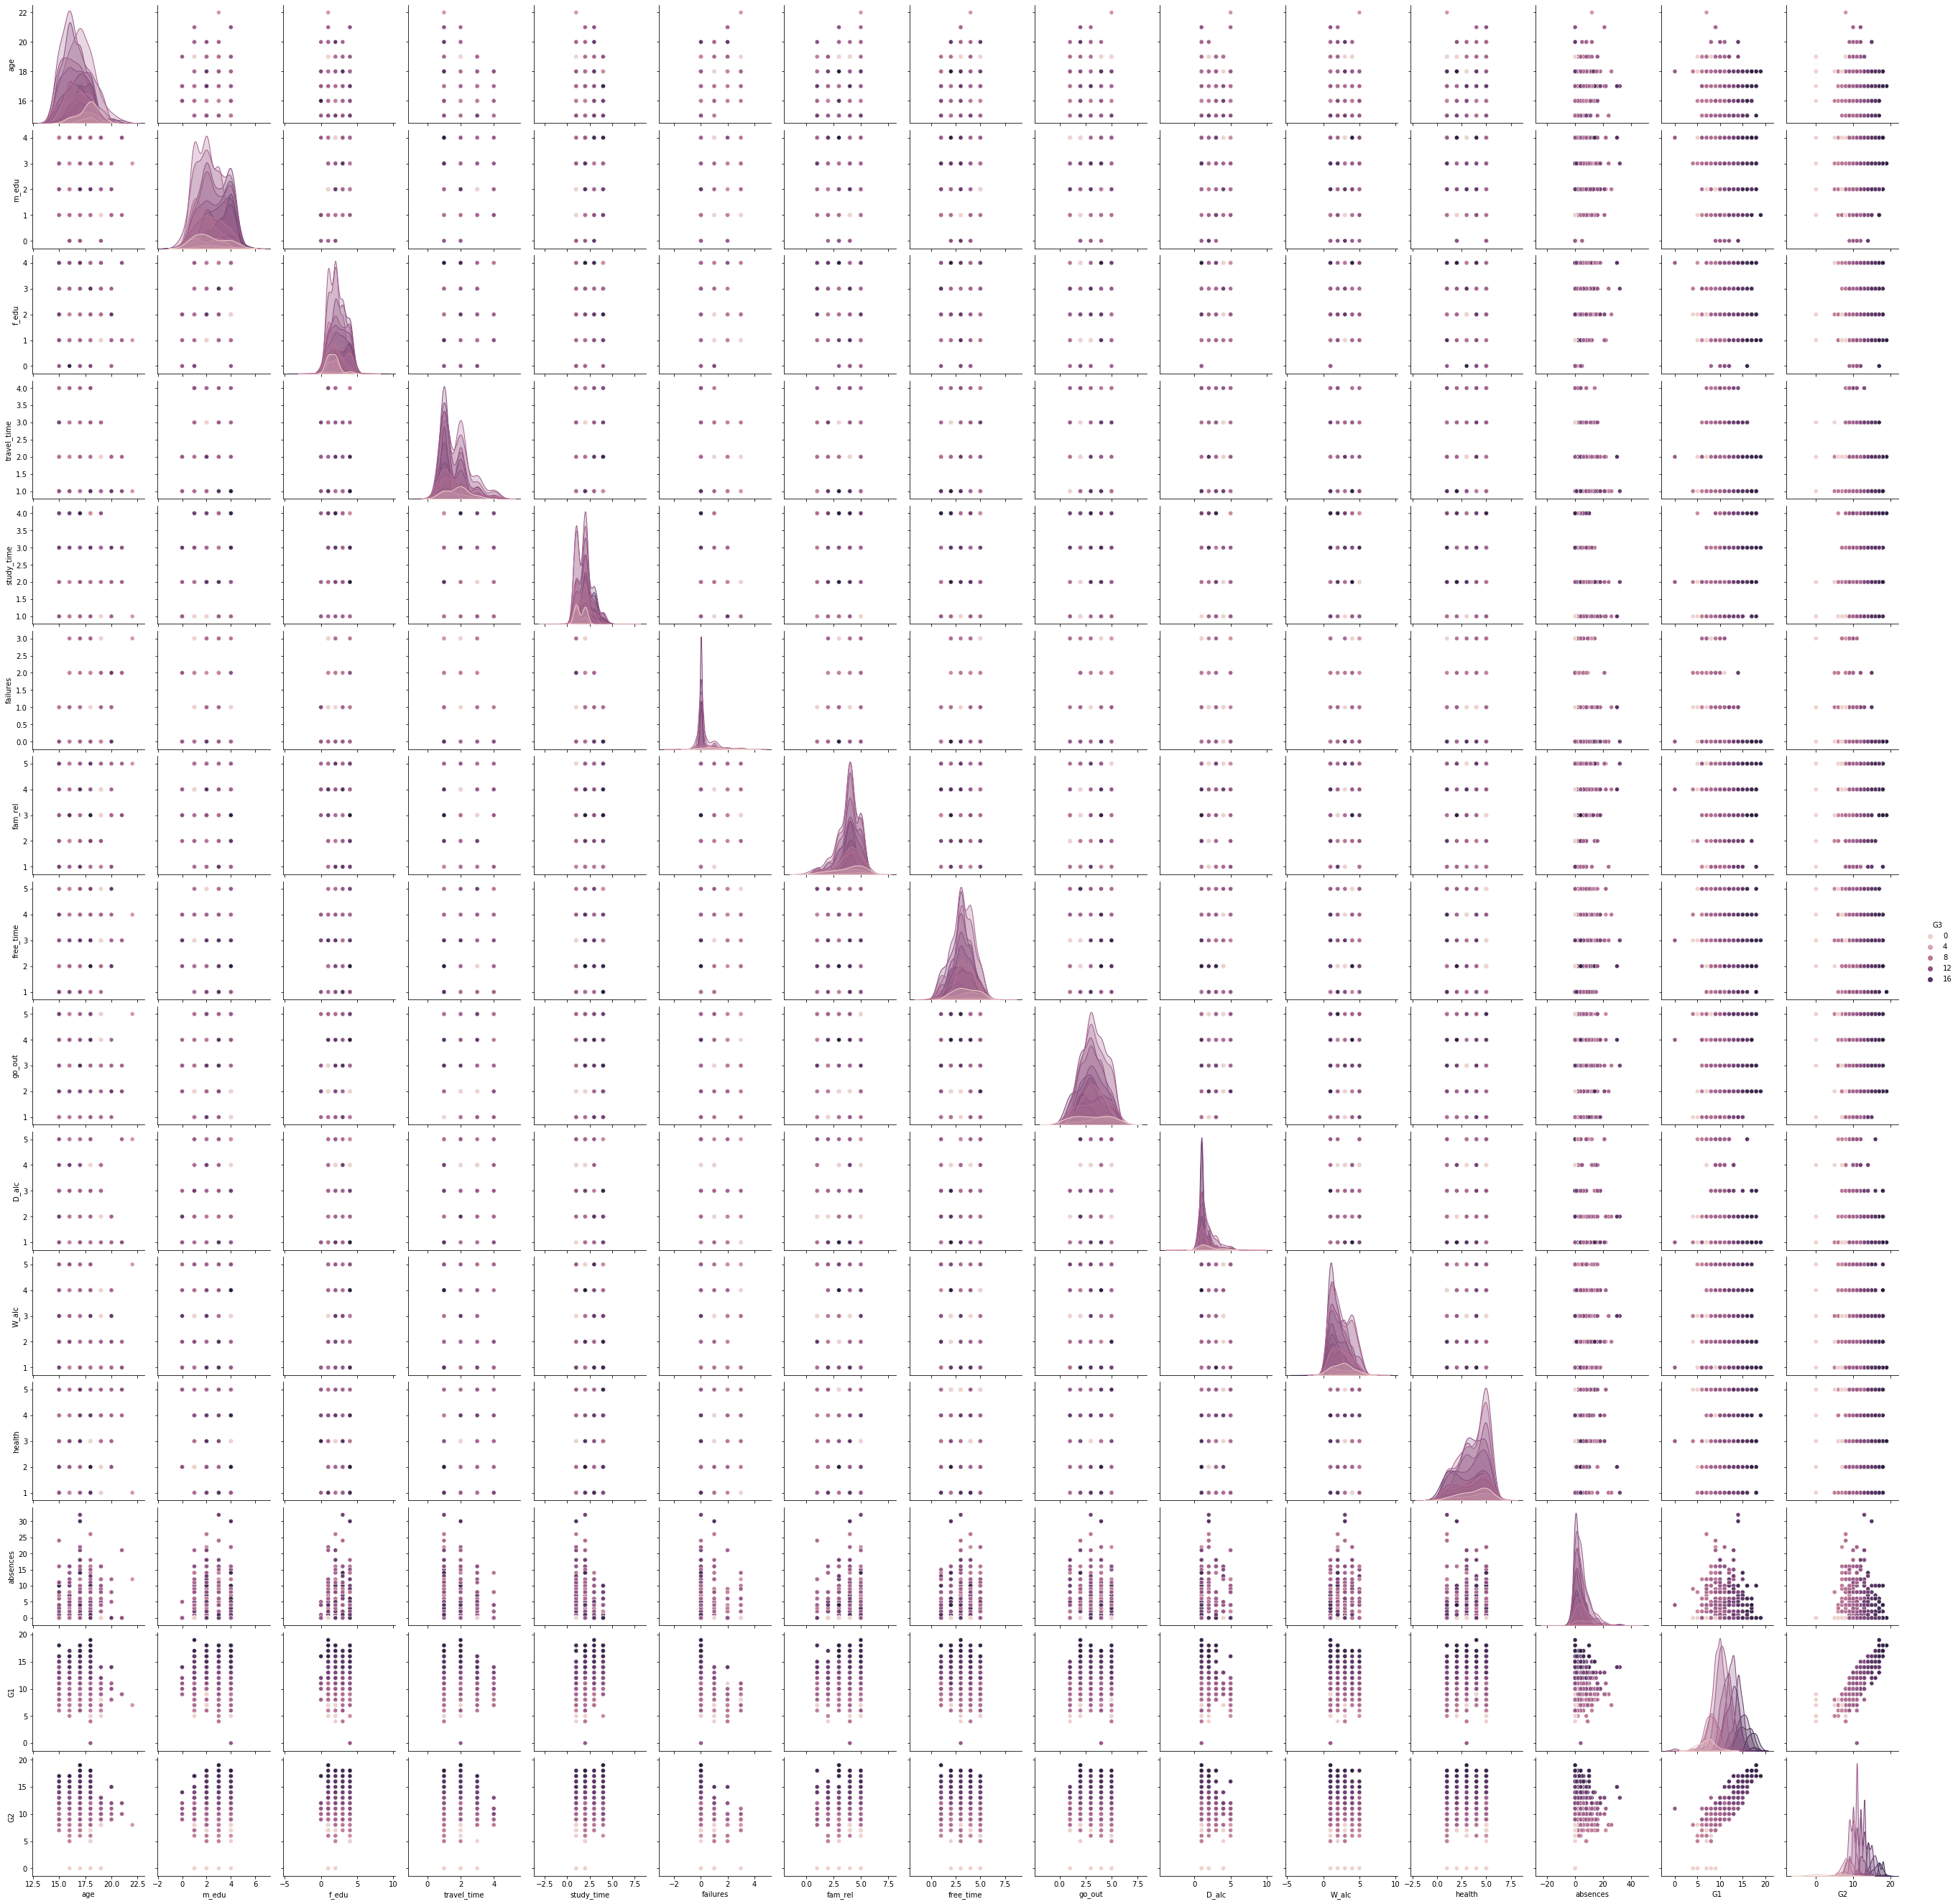

In [17]:
sns.pairplot(df, hue='G3', height=2.5);

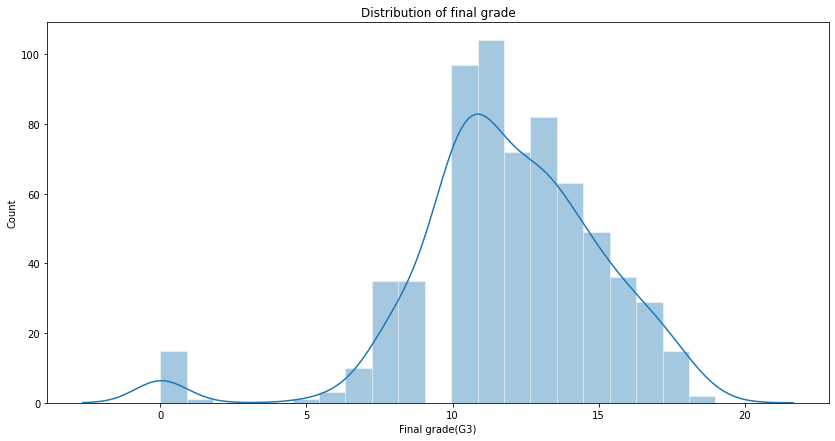

In [14]:
# Distribution of the target variable
fig, ax = plt.subplots(figsize=(14,7))
sns.histplot(df['G3'], kde=True, kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax)
ax.set_title('Distribution of final grade')
ax.set_xlabel('Final grade(G3)');

The final grade is not normally distributed. Most students have a final grade between 10 and 15. There are a few students performing poorly, with a grade less than 5.<br>
Scaling would be applied to the final grade column to make the distribution less skewed. 

In [15]:
# unique values of some columns
cols = df.select_dtypes(include='object').columns
for col in cols:
    print(col.upper())
    print(df[col].value_counts())
    print('****************************************************** \n')

SCHOOL
GP    423
MS    226
Name: school, dtype: int64
****************************************************** 

SEX
F    383
M    266
Name: sex, dtype: int64
****************************************************** 

ADDRESS
U    452
R    197
Name: address, dtype: int64
****************************************************** 

FAM_SIZE
GT3    457
LE3    192
Name: fam_size, dtype: int64
****************************************************** 

P_STATUS
T    569
A     80
Name: p_status, dtype: int64
****************************************************** 

M_JOB
other       258
services    136
at_home     135
teacher      72
health       48
Name: m_job, dtype: int64
****************************************************** 

F_JOB
other       367
services    181
at_home      42
teacher      36
health       23
Name: f_job, dtype: int64
****************************************************** 

REASON
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64
*

In [16]:
# summary statistics of numerical columns
df.describe()

,age,m_edu,f_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,D_alc,W_alc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


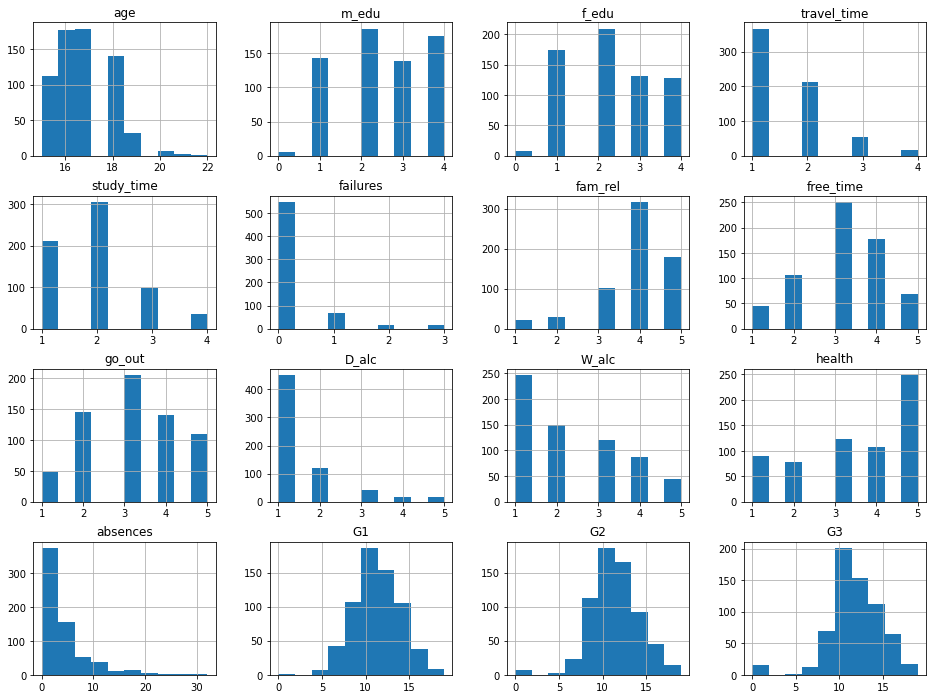

In [17]:
# distribution of features
df.hist(figsize=(16,12));

Some features are not normally distributed. Scaling differs across the features. The features will therefore have to be scaled and normalized.

### Bivariate analysis

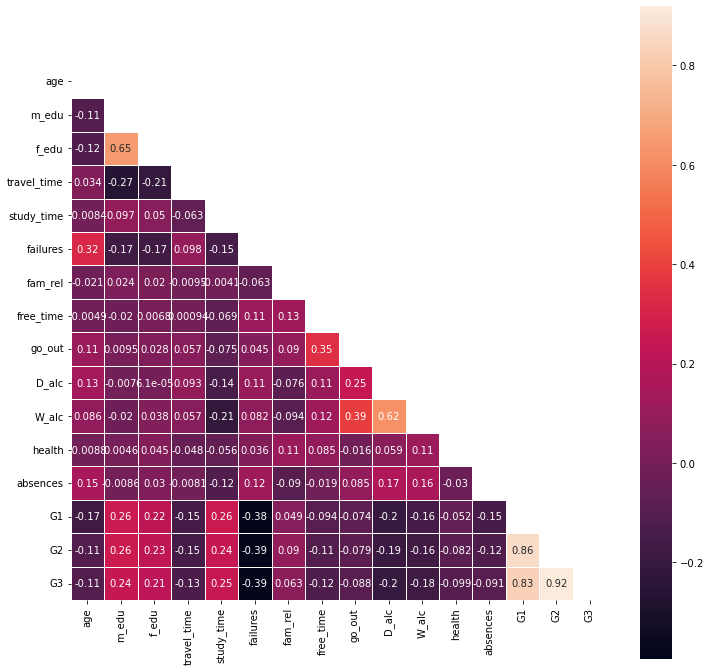

In [18]:
#using a heatmap to show correlation
fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True);

G1 and G2 have a strong positive correlation with G3. <br>
There is a strong positive correlation between G1 and G2. One of these features has to be dropped to handle multicollinearity.<br>
Most of the other features have a low correlation with each other.

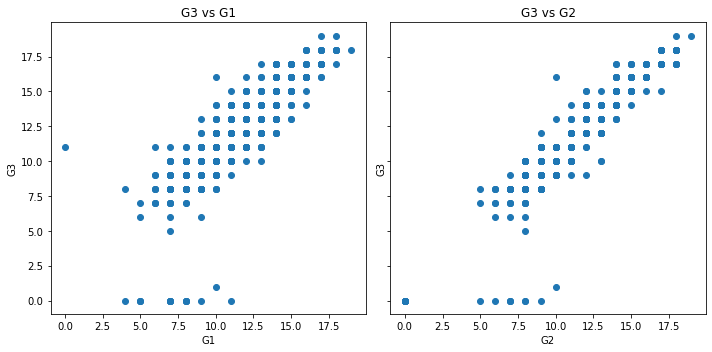

In [19]:
#scatter plots of G3 vs G1 and G3 vs G2
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True )
ax1.scatter(df['G1'], df['G3'])
ax1.set_title(f'G3 vs G1')
ax1.set_xlabel('G1')
ax1.set_ylabel('G3')

ax2.scatter(df['G2'], df['G3'])
ax2.set_title(f'G3 vs G2')
ax2.set_xlabel('G2')
ax2.set_ylabel('G3')
fig.tight_layout();

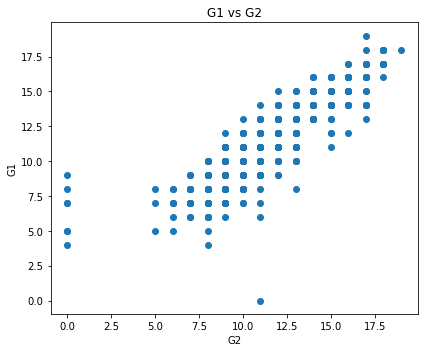

In [20]:
#scatter plots of G1 vs G2
fig, ax= plt.subplots(figsize=(6, 5))
ax.scatter(df['G2'], df['G1'])
ax.set_title(f'G1 vs G2')
ax.set_xlabel('G2')
ax.set_ylabel('G1')
fig.tight_layout();

Since the dataset contains information about student performance in two different secondary schools, we can use a boxplot to show the spread/ distribution of students' final grades by school.

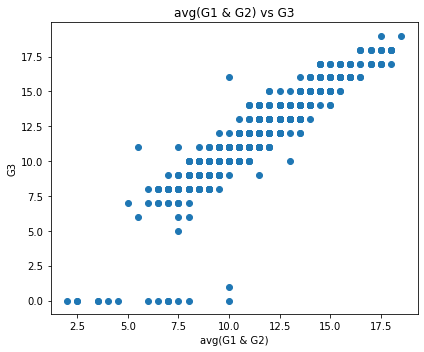

In [22]:
#scatter plots Average of G1 and G2 against G3
fig, ax= plt.subplots(figsize=(6, 5))
ax.scatter(avg_G1_G2, df['G3'])
ax.set_title(f'avg(G1 & G2) vs G3')
ax.set_xlabel('avg(G1 & G2)')
ax.set_ylabel('G3')
fig.tight_layout();

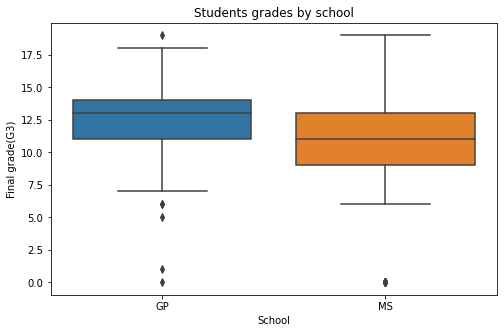

In [23]:
# Box plot of students' grades by school
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x='school', y='G3',data=df, ax=ax)
ax.set_title('Students grades by school')
ax.set_xlabel('School')
ax.set_ylabel('Final grade(G3)');

Comparison of final grades of students in 2 different schools, MS(Mousinho da Silveira) and GP(Gabriel Pereira):
- GP has a higher median grade than MS.
- GP has a smaller box showing that the middle 50% of the data is less dispersed. MS has a longer box showing that the middle 50% of the data is more dispersed.
- GP has a shorter whisker to whisker length while MS has a longer whisker to whisker length. This shows that GP has a lowe spread(range) of data than MS.
- GP has more outliers than MS. <br>
#### NB: <br>
Range = Length of the entire box plot<br>
IQR = Length of the box

In [24]:
df.select_dtypes(include='object')

,school,sex,address,fam_size,p_status,m_job,f_job,reason,guardian,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,no,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,no,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,no,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
645,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,no,no,yes,yes,yes,no
646,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,no,no
647,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no


In [25]:
df.select_dtypes(include='int')

,age,m_edu,f_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,D_alc,W_alc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11,10
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15,16
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12,9
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10,10


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
#finding the average of columns G1 and G2 and adding it as a column to the existing dataframe
G_average = df['G1'] + df['G2'] / 2
df['G_average'] = G_average
df

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,...,free_time,go_out,D_alc,W_alc,health,absences,G1,G2,G3,G_average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,14.5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,18.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,21.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,15.5
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,22.5
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,17.0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,15.0


In [28]:
#dropping columns G1 and G2
df.drop(['G1', 'G2'], axis = 1, inplace = True)

ENCODING

In [29]:
#making a copy of the dataset
df1 = df.copy()


columns_to_encode = ['school','sex','address','fam_size','p_status','m_job','f_job',
                     'reason','guardian','school_sup','fam_sup','paid',
                     'activities','nursery','higher','internet','romantic']

# Create dummy variables for categorical columns in training data
encoded_data = pd.get_dummies(df1[columns_to_encode], columns=columns_to_encode)

new_df = pd.concat([encoded_data, df1.drop(columns_to_encode, axis=1)], axis=1)
new_df

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,fam_size_GT3,fam_size_LE3,p_status_A,p_status_T,...,failures,fam_rel,free_time,go_out,D_alc,W_alc,health,absences,G3,G_average
0,1,0,1,0,0,1,1,0,1,0,...,0,4,3,4,1,1,3,4,11,5.5
1,1,0,1,0,0,1,1,0,0,1,...,0,5,3,3,1,1,3,2,11,14.5
2,1,0,1,0,0,1,0,1,0,1,...,0,4,3,2,2,3,3,6,12,18.5
3,1,0,1,0,0,1,1,0,0,1,...,0,3,2,2,1,1,5,0,14,21.0
4,1,0,1,0,0,1,1,0,0,1,...,0,4,3,2,1,2,5,0,13,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,1,0,1,0,0,1,...,1,5,4,2,1,2,5,4,10,15.5
645,0,1,1,0,0,1,0,1,0,1,...,0,4,3,4,1,1,1,4,16,22.5
646,0,1,1,0,0,1,1,0,0,1,...,0,1,1,1,1,1,5,6,9,17.0
647,0,1,0,1,0,1,0,1,0,1,...,0,2,4,5,3,4,2,6,10,15.0


SPLITTING THE DATASET

In [30]:
# Split the data into training and testing sets
X = new_df.drop(['G3'], axis = 1)
y = new_df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


NOW THAT THE COLUMNS HAVE BEEN ENCODED, LET'S SCALE THE TARGET COLUMN, G3

In [31]:

# Create a StandardScaler object
scaler = StandardScaler()

y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Fit and transform the scaler on the training data
scaled_y_train = scaler.fit_transform(y_train_df)

# Transform the testing data using the fitted scaler
scaled_y_test = scaler.transform(y_test_df)

### MODELS:

* Linear Regression

* Decision Trees Regressor

* Random Forest Regressor

* Support vector Regressor.

* Lasso Regression

* Ridge Regression


# MODEL ENSEMBLING

In [32]:
#dictionary
Models = {'Lin_reg': LinearRegression(),
          'decision_tree': DecisionTreeRegressor(),
          'Random_forest': RandomForestRegressor(), 
          'svm' : SVR(),
          'Lasso': Lasso(),
          'Ridge': Ridge()}

#function to fit and score models
def fit_and_score_model (Models, X_train, y_train, X_test, y_test):
    np.random.seed(42)
    model_score = {}
    for name,model in Models.items():
        model.fit(X_train, y_train) #fit model to data
        model_score[name] = model.score(X_test, y_test) #model score
    return model_score

In [33]:
score = fit_and_score_model(Models = Models, X_train = X_train,
                            y_train = scaled_y_train.ravel(), X_test = X_test, y_test = scaled_y_test.ravel())

score

{'Lin_reg': 0.7856914349193361,
 'decision_tree': 0.603494527760734,
 'Random_forest': 0.8098379232602275,
 'svm': 0.7826443581990443,
 'Lasso': 0.749517921993752,
 'Ridge': 0.7861825471461061}

In [34]:
#function to get the metrics 

def get_metrics(models, X_test, y_test):
    metrics = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(scaled_y_test, y_pred)
        mse = mean_squared_error(scaled_y_test, y_pred)
        rmse = mean_squared_error(scaled_y_test, y_pred, squared = False)
        r2 = r2_score(scaled_y_test, y_pred)
        metrics[name] = [mae, mse, rmse, r2]
    return pd.DataFrame.from_dict(metrics, orient='index', columns=['MAE', 'MSE', 'RMSE', 'R2'])

In [35]:
metrics_df = get_metrics(models = Models, X_test = X_test, y_test = scaled_y_test)
metrics_df

,MAE,MSE,RMSE,R2
Lin_reg,0.326564,0.234034,0.483771,0.785691
decision_tree,0.414169,0.433001,0.658028,0.603495
Random_forest,0.292432,0.207665,0.455703,0.809838
svm,0.290635,0.237362,0.487198,0.782644
Lasso,0.321157,0.273537,0.523008,0.749518
Ridge,0.325962,0.233498,0.483216,0.786183


# MODEL IMPROVEMENT

The model that performed best was the Random forest Regressor. We'd be carrying out hyperparameter tuning to improve it's performance

In [36]:
rf = RandomForestRegressor()

In [37]:
params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
}

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
grid_search = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)

In [40]:
grid_search.fit(X_train, scaled_y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200, 300]})

In [41]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [42]:
def get_metrics(X_test, y_test):
    names = ['','','','']
    metrics = {}
    for name in names:
        y_pred = grid_search.predict(X_test)
        mae = mean_absolute_error(scaled_y_test, y_pred)
        mse = mean_squared_error(scaled_y_test, y_pred)
        rmse = mean_squared_error(scaled_y_test, y_pred, squared = False)
        r2 = r2_score(scaled_y_test, y_pred)
        metrics[name] = [mae,mse,rmse,r2]
    return pd.DataFrame.from_dict(metrics,orient='index',columns=['MAE','MSE','RMSE','R2'])

In [43]:
metrics_df = get_metrics(X_test = X_test, y_test = scaled_y_test)
metrics_df

,MAE,MSE,RMSE,R2
,0.283989,0.197325,0.444213,0.819306


Text(0.5, 1.0, 'predictions vs actual values')

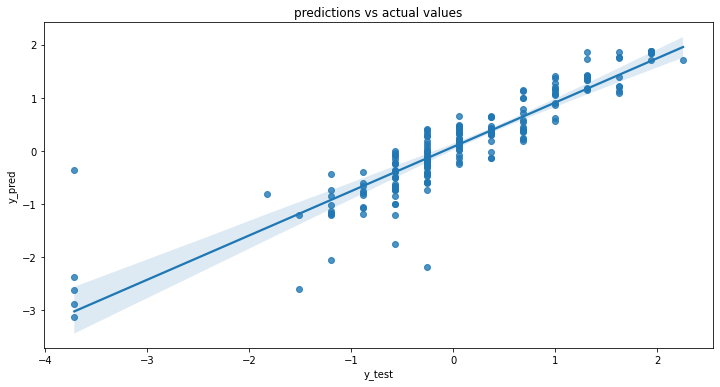

In [46]:
#visualize predicted values against actual values
y_pred = grid_search.predict(X_test)
plt.figure(figsize=(12,6))
sns.regplot(x=scaled_y_test,y=y_pred,marker='o')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('predictions vs actual values')